## Simple Baseline for gossipsite dataset with TFIDF and BOW features

### Decision taken
1. Final dataset column name should be comment and label
2. label should be re map to 'hate' and 'non hate' for interpretibility of results
3. If only using this dataset there should be a solution to class imbalance

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,roc_curve,roc_auc_score,confusion_matrix,recall_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


## Load Dataset

In [2]:
df = pd.read_csv('../Datasets/raw/gossip_dataset_complete_v0.csv',header =None)
df.columns = ['comment','label']

In [3]:
import sys
sys.path.insert(1,'G:\\Github\\Sinhala-Hate-Speech-Detection')
import utills
df_cleaned = utills.preprocess(df,'comment')
df_cleaned.head()

,comment,label,cleaned
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද
1,තූ ෙනදකින්,1,තූ ෙනදකින්
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හ...,0,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා හ...
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා...,0,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා...
4,පූදින්ෙන නැතුව ඉදිං,1,පූදින්ෙන නැතුව ඉදිං


## Split dataset

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(df_cleaned['cleaned'],df_cleaned['label'], test_size=0.3, random_state=0,stratify=df_cleaned['label'].values)
print("X train {} Y train {} X test {} Y test {}".format(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))
#stratify=df[1]

X train (4527,) Y train (4527,) X test (1941,) Y test (1941,)


## Check CountVectorizer

In [5]:
# unigrams
vectorizer = CountVectorizer(analyzer="word", tokenizer=lambda text: text.split())
vectorizedTrainComments = vectorizer.fit_transform(X_train)
vectorizer.get_feature_names()[:20]

['අ',
 'අං',
 'අංක',
 'අංකල්',
 'අංග',
 'අංගජාතය',
 'අංගජාතයක්',
 'අංගජාතයකුත්',
 'අංගම්',
 'අංගයක්',
 'අංගොඩ',
 'අංගොඩට',
 'අංචියක්',
 'අංජන',
 'අංශ',
 'අංශක',
 'අංශභාග',
 'අංශයට',
 'අංශයත්',
 'අංශයේ']

In [9]:
print('The shape is', vectorizedTrainComments.shape)
# postion
vectorizer.vocabulary_

The shape is (4527, 17772)


{'ඇත්ත': 1460,
 'තමයි': 6607,
 'ලාලෝ': 13735,
 'උඹ': 2373,
 'තවම': 6694,
 'පොඩි': 10578,
 'වැඩියි': 14574,
 'කොලුවො': 4960,
 'ඒවා': 2983,
 'තේරුම්': 7025,
 'ගන්න': 5105,
 'සමහරු': 15674,
 'මයිනස්': 11827,
 'වැටෙන': 14510,
 'භියෙන්': 11593,
 'හිතේ': 17270,
 'අදහස්': 259,
 'හිරකරගෙන': 17314,
 'හිටියට': 17184,
 'මට': 11676,
 'එහෙම': 2853,
 'එකක්': 2484,
 'නෑ': 8535,
 'මගේ': 11655,
 'අදහස': 254,
 'මම': 11818,
 'කොටලා': 4797,
 'දානවා': 7355,
 'මහින්ද': 12027,
 'තනියමද': 6577,
 'රට': 13190,
 'බේර': 11442,
 'ගත්තෙ': 5083,
 'එස්': 2834,
 'එෆ්': 2892,
 'ව': 14008,
 'බොරු': 11491,
 'චෝදනා': 6035,
 'පිට': 10006,
 'හිරේ': 17333,
 'යවනකොට': 12917,
 'තොපේ': 7062,
 'කටවල්': 3275,
 'ඇරුනෙ': 1673,
 'නැත්තෙ': 8454,
 'මොකද': 12742,
 'මරාට': 11884,
 'දැන්': 7459,
 'එදා': 2664,
 'කරපුවයෙ': 3640,
 'රිටර්න්': 13420,
 'එක': 2479,
 'එන': 2671,
 'කාලෙ': 4061,
 'යමක්': 12904,
 'කරද්දි': 3582,
 'ඒක': 2901,
 'පෙරලා': 10485,
 'තමන්ටත්': 6602,
 'ලැබෙන': 13777,
 'බව': 11032,
 'බලයෙන්': 10976,
 'උදම්වෙලා': 2200,
 'පිස

What to do for \u codes 

In [ ]:
# remove \u codes
#df['cleaned'] = df[].apply(lambda x: utills.ignotre_characters(x))

## Bag of words with Logistic regression

In [14]:
pip install dill 
#To solve the error of python cannot pickle labda functions. (tokenization)

In [12]:
bow_vectorizer = CountVectorizer(analyzer="word", tokenizer=lambda text: text.split())
lr = LogisticRegression()
bow_lr_pipe = Pipeline([('bow', bow_vectorizer), ('lr', lr)])


bow_lr_pipe.fit(X_train, Y_train)

#predictions
Y_pred_bow = bow_lr_pipe.predict(X_test)


#import dill

# import joblib
# filename = '../trained_models/model_lr_bow.sav'
# joblib.dump(bow_lr_pipe, filename)

In [13]:
# with stratified sampling
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_bow))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1337
           1       0.79      0.60      0.68       604

    accuracy                           0.82      1941
   macro avg       0.81      0.76      0.78      1941
weighted avg       0.82      0.82      0.82      1941



In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_bow, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1338
           1       0.78      0.53      0.63       603

    accuracy                           0.81      1941
   macro avg       0.80      0.73      0.75      1941
weighted avg       0.80      0.81      0.80      1941



In [14]:
# Accuracy = TP/(TP+FN+FP+TP)
print(f"bow model accuracy = {accuracy_score(Y_test, Y_pred_bow)}")


# specificiry - True Negative rate   = TN / (FP + TN)          (1- False positive rate)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_bow).ravel()
specificity = tn / (tn+fp)
print(f"bow model specificity = {specificity}")
#sensitivity  - True Positive rate = Recall = TP/(TP + FN)
print(f"bow model Sensitivity = {recall_score(Y_test, Y_pred_bow)}")


# Precision = TP/(TP + FP)
print(f"bow model Precision = {precision_score(Y_test, Y_pred_bow)}")
# Recall = TP/(TP + FN)
print(f"bow model Recall = {recall_score(Y_test, Y_pred_bow)}")

print(f"bow model confusion matrix = {confusion_matrix(Y_test, Y_pred_bow)}")


# F1 score = 2TP/(2TP + FP+ FN )  = 2*(precision * Recall)/ (precsion + recall)
print(f"bow model F1-score = {f1_score(Y_test, Y_pred_bow)}")

# ROC - reciver operating characteristic curve
# plots True positive rate(precision) vs. False positive Rate(1-TNR) for each threshold we want to compare.
# does not depend on the class distribution
# shows the trade-off between sensitivity (TPR) and specificity (1 – FPR)
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[0,1],
        y=[0,1],
        name="TPR = FPR",
        line=dict(color="black", dash="dash")
    )
)

def PlotRocAuc(y_test, y_pred, color, model_name):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_bow)
    auc_score = roc_auc_score(Y_test,Y_pred_bow)
    fig.add_trace(
        go.Scatter(
            x=fpr,
            y=tpr,
            name=f"{model_name}(AUC={auc_score})",
            marker=dict(color=color)
        )
    )

    fig.update_layout(title="ROC curve",
                  xaxis_title="False Positive Rate",
                  yaxis_title="True Positive Rate")

    fig.show()
    
PlotRocAuc(Y_test, Y_pred_bow, "green", "bow_clf")

fig.update_layout(title="ROC curve",
                  xaxis_title="False Positive Rate",
                  yaxis_title="True Positive Rate")

fig.show() 



bow model accuracy = 0.824317362184441
bow model specificity = 0.9259536275243081
bow model Sensitivity = 0.5993377483443708
bow model Precision = 0.7852494577006508
bow model Recall = 0.5993377483443708
bow model confusion matrix = [[1238   99]
 [ 242  362]]
bow model F1-score = 0.6798122065727699


Predicted     0    1
Actual              
0          1247   91
1           281  322


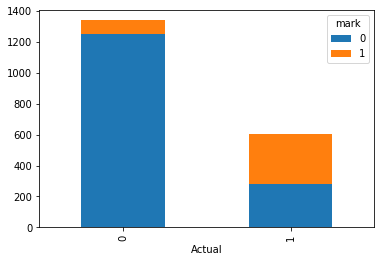

In [31]:
def confusion_Matrix(y_test,y_pred):
    confusionMatrix = pd.crosstab(y_test,Y_pred_bow , rownames=["Actual"], colnames=["Predicted"])
    print(confusionMatrix)
    confusionMatrix.plot.bar(stacked=True)
    plt.legend(title='mark')
    plt.show()
confusion_Matrix(Y_test,Y_pred_bow)

In [33]:
testWords = bow_vectorizer.get_feature_names()

In [34]:
modelCoeffs = lr.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : testWords, 'Coefficient' : modelCoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print(coeffdf.tail(10))
print(coeffdf.head(10))
print(coeffdf.loc[coeffdf['Word'] == "උසාවි"])

         Word  Coefficient
15223    වෙයි    -0.986312
12734   මොකක්    -1.047280
2484     එකක්    -1.059803
15326    වේවා    -1.061392
3867       ක්    -1.066399
1778    ඉතින්    -1.096325
12660     මේක    -1.100023
578       අපේ    -1.138674
6886   තියෙනව    -1.163979
3051       ඔබ    -1.244891
          Word  Coefficient
13966   ලොල්ලො     4.205559
12806      මෝඩ     3.525997
14038      වගේ     3.216717
7075        තෝ     3.023119
17014    හැත්ත     2.882996
8808   නෙදකින්     2.768359
9356        පල     2.665434
12512       මූ     2.546936
5251      ගවයො     2.441298
7054      තොපි     2.433188
       Word  Coefficient
2449  උසාවි    -0.129547


## Logistic regression model with TFIDF features

In [15]:
tfidf_vectorizer = TfidfVectorizer(analyzer ='word',tokenizer=lambda text: text.split())
tfidf_lr_pipe = Pipeline([('tfidf', tfidf_vectorizer), ('lr', lr)])


tfidf_lr_pipe.fit(X_train, Y_train)

Y_pred_tfidf = tfidf_lr_pipe.predict(X_test)


In [16]:
# stratified sampling
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1337
           1       0.85      0.45      0.59       604

    accuracy                           0.80      1941
   macro avg       0.82      0.71      0.73      1941
weighted avg       0.81      0.80      0.78      1941



In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1338
           1       0.83      0.40      0.54       603

    accuracy                           0.79      1941
   macro avg       0.81      0.68      0.70      1941
weighted avg       0.80      0.79      0.76      1941



Predicted     0    1
Actual              
0          1290   48
1           361  242


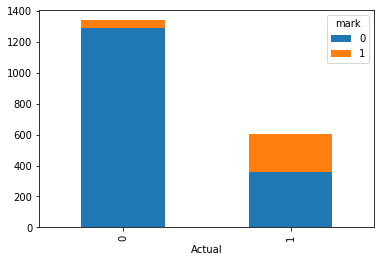

In [42]:
confusion_Matrix(Y_test,Y_pred_tfidf)

In [17]:

# Accuracy = TP/(TP+FN+FP+TP)
print(f"tfidf model accuracy = {accuracy_score(Y_test, Y_pred_tfidf)}")


# specificiry - True Negative rate   = TN / (FP + TN)          (1- False positive rate)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_tfidf).ravel()
specificity = tn / (tn+fp)
print(f"tfidf model specificity = {specificity}")
#sensitivity  - True Positive rate = Recall = TP/(TP + FN)
print(f"tfidf model Sensitivity = {recall_score(Y_test, Y_pred_tfidf)}")

# Precision = TP/(TP + FP)
print(f"tfidf model Precision = {precision_score(Y_test, Y_pred_tfidf)}")
# Recall = TP/(TP + FN)
print(f"tfidf model Recall = {recall_score(Y_test, Y_pred_tfidf)}")

print(f"tfidf model confusion matrix = {confusion_matrix(Y_test, Y_pred_tfidf)}")

# F1 score = 2TP/(2TP + FP+ FN )  = 2*(precision * Recall)/ (precsion + recall)
print(f"tfidf model F1-score = {f1_score(Y_test, Y_pred_tfidf)}")

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[0,1],
        y=[0,1],
        name="TPR = FPR",
        line=dict(color="black", dash="dash")
    )
)
    
PlotRocAuc(Y_test, Y_pred_tfidf, "green", "tfidf_clf")

fig.update_layout(title="ROC curve",
                  xaxis_title="False Positive Rate",
                  yaxis_title="True Positive Rate")





tfidf model accuracy = 0.8042246264811953
tfidf model specificity = 0.9633507853403142
tfidf model Sensitivity = 0.4519867549668874
tfidf model Precision = 0.8478260869565217
tfidf model Recall = 0.4519867549668874
tfidf model confusion matrix = [[1288   49]
 [ 331  273]]
tfidf model F1-score = 0.5896328293736501


For this dataset bow perform better than TFIDF , not removing stop words might have affect result. Need to check this with another experiment

## Word2vec model with logistic regression

size: The number of dimensions of the embeddings and the default is 100.

window: The maximum distance between a target word and words around the target word. The default window is 5.

min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

workers: The number of partitions during training and the default workers is 3.

sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW

In [32]:
# The train and test data was converted to list of strings since word2vec requires that
#train_corpus = [" ".join() for x in X_train]
train_corpus = [x.split() for x in X_train]
test_corpus = [x.split() for x in X_test]  

In [48]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
# skip gram model - good for high morphological languafes
model = gensim.models.Word2Vec(train_corpus, vector_size=300,window = 10,min_count=1,sg=1)
print(model.wv)
print(len(model.wv.vectors))
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))


17806


In [49]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec,size = 300):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = size #len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [47]:
unique, frequency = np.unique(Y_pred_w2v,  return_counts = True)
print(unique,frequency)

[0] [1941]


C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1337
           1       0.00      0.00      0.00       604

    accuracy                           0.69      1941
   macro avg       0.34      0.50      0.41      1941
weighted avg       0.47      0.69      0.56      1941

Predicted     0
Actual         
0          1337
1           604


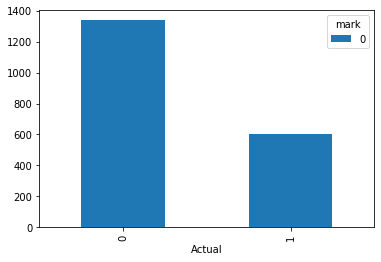

In [50]:
lr = LogisticRegression()
w2v_lr_pipe = Pipeline([('w2v', MeanEmbeddingVectorizer(w2v)), ('lr', lr)])


w2v_lr_pipe.fit(X_train, Y_train)

Y_pred_w2v = w2v_lr_pipe.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_w2v))

utills.confusion_Matrix(Y_test,Y_pred_w2v)

utills.PlotRocAuc(Y_test, Y_pred_w2v, "green", "w2v_clf")

In [52]:
model = gensim.models.Word2Vec(train_corpus,
                               vector_size=300,
                               window=100,
                               min_count=10,
                               sample=1e-3)

In [51]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                for tokenized_sentence in corpus]
    return np.array(features)

In [53]:
avg_wv_train_features = averaged_word_vectorizer(corpus=train_corpus,
                                                 model=model.wv,
                                                 num_features=300)
avg_wv_test_features = averaged_word_vectorizer(corpus=test_corpus,
                                                model=model.wv,
                                                num_features=300)

In [ ]:
lr = LogisticRegression()
lr.fit(avg_wv_train_features,Y_train)
Y_pred_avg_w2v=lr.predict(avg_wv_test_features)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_avg_w2v))

utills.confusion_Matrix(Y_test,Y_pred_avg_w2v)

utills.PlotRocAuc(Y_test, Y_pred_avg_w2v, "green", "avg_w2v_clf")

In [18]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('G:\\Github\\Sinhala-Hate-Speech-Detection\\Embedding_models\\fasttext_300.w2v')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 38: character maps to <undefined>

In [5]:
from gensim.models import Word2Vec
model = Word2Vec.load_word2vec_format("G:/Github/Sinhala-Hate-Speech-Detection/Embedding_models/cbow_300.w2v")
path = "../Embedding_models/cbow_300.w2v"
model = word2vec.Word2Vec.load(path)
#gensim.models.KeyedVectors.load_word2vec_format
words = list(model.wv.vocab)
print(len(words))
print(words)
model.most_similar('නීතිය')

AttributeError: type object 'Word2Vec' has no attribute 'load_word2vec_format'